$\huge{solution \ \ of \ \ 2.1}$

we have to solve 

min $ \sum_{i=1}^{i=6} \ \ \mid Q_i \mid ^p$  

for some $ p \ge 1$

and $Q_i=R_i-\tilde{R_i}$

and $\tilde{R_i}=a_0+a_1T_i+a_2D_i$

$R_i$ = actual revenues

$T_i=$  view-time per view

$D_i=$  number of unskipped ads per view




$\\ \\ \\ \\ \\ \\ \\ \\ \\ \\ \\ $


 we can formulate linear programm for p=1 as follow

 let $a_0$ be a base revenue for videos

let $a_1$ be  average view-time

let $a_2$ be  average number of unskipped ads

min $\sum_{i=1}^{i=6} (x_{i \ 0} + x_{i \ 1})$

subjected to 

$ (x_{i \ 0} - x_{i \ 1}) =R_i-(a_0+a_1T_i+a_2D_i)$ $i \in (1,2,3,4,5,6)$

$x_{i \ j} \ge 0$ i={1,2,3,4,5,6} j={0,1}

$a_0 \ge 0$

$a_1,a_2 \in \mathbb{R}$

$R_i$ = actual revenues

$T_i=$  view-time per view

$D_i=$  number of unskipped ads per view

here 
 $Q_i=  x_{i \ 0} - x_{i \ 1} \\ \\ and \mid Q_i \mid= x_{i \ 0} + x_{i \ 1}$

 $ x_{i \ 0}=Q_i \ \ \  if \ \ \  Q_i \ge 0$

$ x_{i \ 0}=0 \ \ \  if \ \ \  Q_i < 0$

$ x_{i \ 1}=0 \ \ \  if \ \ \  Q_i \ge 0$

$ x_{i \ 1}=-Q_i\ \ \  if \ \ \  Q_i < 0$

 i={1,2,3,4,5,6}




In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
!pip install -q pyomo
!apt-get install -y -qq coinor-cbc
from pyomo.environ import *
!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64

In [ ]:
data=pd.read_csv('lab8_coef.csv').set_index('video')

In [ ]:
def lpmodel():
  global model
  model=ConcreteModel()
  model.x=Var(range(6),range(2),domain=NonNegativeReals)
  model.y=Var(range(3))
  model.y[0].setlb(0)
  model.objective=Objective(expr=sum(model.x[i,0]+model.x[i,1]  for i in range(6)),sense=minimize)
  model.constraint=ConstraintList()
  for i in range(6):
    model.constraint.add(data.loc[i+1,'umoney']-model.y[0]-(data.loc[i+1,'total_view_time']/data.loc[i+1,'views'])*model.y[1]-(data.loc[i+1,'total_unskipped_add']/data.loc[i+1,'views'])*model.y[2]==model.x[i,0]-model.x[i,1])

In [ ]:
def result():
  opt_cbc=SolverFactory('cbc')
  result = opt_cbc.solve(model)
  print('Solver status:', result.solver.status)
  print('Solver termination condition:',result.solver.termination_condition)
  print('\nObjective = ', model.objective())
  print(result)
  print('a0=',model.y[0].value)
  print('a1=',model.y[1].value)
  print('a2=',model.y[2].value)
  print(model.constraint.display())

In [ ]:
lpmodel()
result()

Solver status: ok
Solver termination condition: optimal

Objective =  3986.158757

Problem: 
- Name: unknown
  Lower bound: 3986.158705
  Upper bound: 3986.158705
  Number of objectives: 1
  Number of constraints: 7
  Number of variables: 16
  Number of nonzeros: 12
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created subproblems: None
    Black box: 
      Number of iterations: 7
  Error rc: 0
  Time: 0.019953250885009766
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

a0= 0.0
a1= 4.0039722
a2= 8969.6127
constraint : Size=6
    Key : Lower : Body                    : Upper
      1 :   0.0 :   6.984127054465716e-07 :   0.0
      2 :   0.0 :   5.048077014180308e-07 :  

$\huge{solution \ \ \ of \ \ \ 2.4}$

Solver status: ok

Solver termination condition: optimal

optimal solution values for the decision variables

$a_0$= 0.0

$a_1$= 4.0039722

$a_2$ = 8969.6127

Objective function value =  3986.158757

here L1 norm is too big so it is not a good forecasting model we have to check another model according to that model we can see from table below is it better forecast for video 2 and 4 but difference for another forecast is too high like for video 3 it predict 652 more than  actual revenue  also for video 6 it predict 3250 more than actual revenue

|video|forecasting revenue for p=1|actual revenue|
|---|---|---|
|1|230\.1716555575259|175|
|2|450\.0000000071345|450|
|3|398\.27040314694614|1050|
|4|900\.0000000077011|900|
|5|47\.87680085631402|19|
|6|299\.61934788543334|3550|



$\huge{solution \ \ of \ \ 2.5}$ 

we can formulate non linear programm as follow

let $a_0$ be a base revenue for videos

let $a_1$ be  average view-time

let $a_2$ be  average number of unskipped ads

min $\sum_{i=1}^{i=6} (x_{i \ 0} + x_{i \ 1})^p$

for some $ p \ge 1$

subjected to 

$ (x_{i \ 0} - x_{i \ 1}) =R_i-(a_0+a_1T_i+a_2D_i)$ $i \in (1,2,3,4,5,6)$

$x_{i \ j} \ge 0$

 i={1,2,3,4,5,6} $\ \ \ \ $ j={0,1}

$a_0 \ge 0$

$a_1,a_2 \in \mathbb{R}$

$R_i$ = actual revenues

$T_i=$  view-time per view

$D_i=$  number of unskipped ads per view

here 
 $Q_i=  x_{i \ 0} - x_{i \ 1} \\ \\ and \mid Q_i \mid= x_{i \ 0} + x_{i \ 1}$

 $ x_{i \ 0}=Q_i \ \ \  if \ \ \  Q_i \ge 0$

$ x_{i \ 0}=0 \ \ \  if \ \ \  Q_i < 0$

$ x_{i \ 1}=0 \ \ \  if \ \ \  Q_i \ge 0$

$ x_{i \ 1}=-Q_i\ \ \  if \ \ \  Q_i < 0$

 i={1,2,3,4,5,6}





$ \\ \\ \\ \\ \\ \\ \\ \\ $



 or we can formulate as 

 let $a_0$ be a base revenue for videos

let $a_1$ be  average view-time

let $a_2$ be  average number of unskipped ads

 min $ \sum_{i=1}^{i=6} \ \  (\sqrt (Q_i^2)) ^p$  

for some $ p > 1$

and $Q_i=R_i-\tilde{R_i}$

and $\tilde{R_i}=a_0+a_1T_i+a_2D_i$

$R_i$ = actual revenues

$T_i=$  view-time per view

$D_i=$  number of unskipped ads per view

 i={1,2,3,4,5,6}



In [ ]:
def non_linear_model(p):
  global model2
  model2=ConcreteModel()
  model2.x=Var(range(6),range(2),domain=NonNegativeReals,initialize=0)
  model2.y=Var(range(3),initialize=0)
  model2.y[0].setlb(0)
  def objective(model2):
    return sum((model2.x[i,0]+model2.x[i,1])**p  for i in range(6))
  model2.cost=Objective(rule= objective, sense=minimize)
  model2.constraint=ConstraintList()
  for i in range(6):
    model2.constraint.add(data.loc[i+1,'umoney']-model2.y[0]-(data.loc[i+1,'total_view_time']/data.loc[i+1,'views'])*model2.y[1]-(data.loc[i+1,'total_unskipped_add']/data.loc[i+1,'views'])*model2.y[2]-(model2.x[i,0]-model2.x[i,1])==0)

In [ ]:
def result1():
  solver = SolverFactory('ipopt', executable='/content/ipopt')
  results = solver.solve(model2)
  print(results)
  print('\nCost = ', model2.cost())
  print('x1 = ', model2.y[0].value)
  print('x2 = ', model2.y[1]())
  print("X3 = ",model2.y[2]())
  print('\constraints')
  print(model2.constraint.display())

In [ ]:
def non_linear_model2(p):
  global model3
  model3=ConcreteModel()
  model3.y=Var(range(3),initialize=0)
  model3.y[0].setlb(0)
  def obje(model3):
    a=sum((((data.loc[i+1,'umoney']-model3.y[0]-(data.loc[i+1,'total_view_time']/data.loc[i+1,'views'])*model3.y[1]-(data.loc[i+1,'total_unskipped_add']/data.loc[i+1,'views'])*model3.y[2])**2)**0.5)**p for i in range(6))
    return a
  model3.cost=Objective(rule= obje, sense=minimize)


In [ ]:
def result2():
  solver = SolverFactory('ipopt', executable='/content/ipopt')
  results = solver.solve(model3)
  print(results)
  print('\nCost = ', model3.cost())
  print('x1 = ', model3.y[0].value)
  print('x2 = ', model3.y[1]())
  print("X3 = ",model3.y[2]())

In [ ]:
non_linear_model(1)
result1()


Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 15
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.027046918869018555
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


Cost =  3986.158705346472
x1 =  0.0
x2 =  4.003972194527096
X3 =  8969.612711182004
\constraints
constraint : Size=6
    Key : Lower : Body                    : Upper
      1 :   0.0 : -1.4523550362355309e-08 :   0.0
      2 :   0.0 :  -7.134474344638875e-09 :   0.0
      3 :   0.0 :  2.9707507565035485e-09 :   0.0
      4 :   0.0 :   -7.70114638726227e-09 :   0.0
      5 :   0.0 : -1.4523557467782666e-08 :   0.0
      6 :   0.0 :  2.9704096959903836e-09 :   0.0
None


In [ ]:
data['forecasting revenue for p=1']=[model2.y[0]()+(data.loc[i+1,'total_view_time']/data.loc[i+1,'views'])*model2.y[1]()+(data.loc[i+1,'total_unskipped_add']/data.loc[i+1,'views'])*model2.y[2]() for i in range(6)]

In [ ]:
norm1=model2.cost()

In [ ]:
non_linear_model(1.5)
result1()


Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 15
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.03595614433288574
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


Cost =  188066.9241150718
x1 =  503.74059414042114
x2 =  2.723599510232543
X3 =  4802.719658714405
\constraints
constraint : Size=6
    Key : Lower : Body                   : Upper
      1 :   0.0 : -9.960842817235971e-09 :   0.0
      2 :   0.0 : -9.951577339961659e-09 :   0.0
      3 :   0.0 :   9.95379423329723e-09 :   0.0
      4 :   0.0 : -9.921137689161696e-09 :   0.0
      5 :   0.0 : -9.963059710571542e-09 :   0.0
      6 :   0.0 :  9.984432836063206e-09 :   0.0
None


In [ ]:
norm1_5=model2.cost()**(1/1.5)

In [ ]:
data['forecasting revenue for p=1.5']=[model2.y[0]()+(data.loc[i+1,'total_view_time']/data.loc[i+1,'views'])*model2.y[1]()+(data.loc[i+1,'total_unskipped_add']/data.loc[i+1,'views'])*model2.y[2]() for i in range(6)]

In [ ]:
non_linear_model(2)
result1()


Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 15
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.028303146362304688
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


Cost =  8399946.937008213
x1 =  884.3228471774885
x2 =  1.8562371587260271
X3 =  3097.0698798873823
\constraints
constraint : Size=6
    Key : Lower : Body                   : Upper
      1 :   0.0 : -9.999098438129295e-09 :   0.0
      2 :   0.0 : -9.998871064453851e-09 :   0.0
      3 :   0.0 :  9.971763859084604e-09 :   0.0
      4 :   0.0 : -9.997904726333218e-09 :   0.0
      5 :   0.0 : -9.999325811804738e-09 :   0.0
      6 :   0.0 :  9.999894245993346e-09 :   0.0
None


$\huge{ solution \ \  \ of  \ \ \ 2.7}$

for p=1.5

solver status: ok

Termination condition: optimal

 time taken by solver : 0.07307767868041992

objective function value =  188066.9241150718

a0 =  503.74059414042114


a1 =  2.723599510232543


a2 =  4802.719658714405

for p=2

solver status: ok

Termination condition: optimal

 time taken by solver : 0.04479360580444336

 objective function value  =  8399946.937008213

a0 =  884.3228471774885


a1 =  1.8562371587260271


a2 =  3097.0698798873823

here a0 value increases  a1 value is decreases  and a2  value decreases for p=1.5 compare to p=2

we want to minimize the difference of actual revenue and forecasting revenue for each case for that we taken $L^p$ norm and want to check if we change the value of p is we get better approximation 

for p=1 we get $L^1$ norm  of differnce of actual revenue and forecasting revenue as 3986.158705346472

for p=1.5 we can find by taking $(1/p)^{th}$ power of our objective and we get 
$L^{1.5}$ norm of differnce of actual revenue and forecasting revenue as 3282.526803990223

for p=2 we can find by taking $(1/p)^{th}$ power of our objective and we get 
$L^2$  norm of differnce of actual revenue and forecasting revenue as 2898.2661949876538

since when p=2 we get better approximation among them so we can say p=2 better approximate because $L^2$ norm of differnce of actual revenue and forecasting revenue is less than another $L^P$ norm for p=1,p=1.5 but no one among them good fit to our data

L1 NORM=3986.158705346472

L1.5 NORM=3282.526803990223

L2 NORM=2898.2661949876538

|video|forecasting revenue for p=1\.5|forecasting revenue for p=2|actual revenue|
|---|---|---|---|
|1|628\.7021081923602|965\.2012294863167|175|
|2|747\.4074504366749|1041\.9215492382177|450|
|3|724\.1839230813847|1027\.7168461229264|1050|
|4|1012\.0521695225439|1216\.6632431129337|900|
|5|529\.6479224168348|901\.0762604078004|19|
|6|668\.6290117130712|991\.420871671806|3550|

we can see from table p=1.5 does not better predict for anyone but its difference is less than p=1

also for p=2 it better predict for video 3 and difference is less than another two 




In [ ]:
norm2=model2.cost()**(1/2)

In [ ]:
print(norm1)
print(norm1_5)
print(norm2)

3986.158705346472
3282.526803990223
2898.2661949876538


In [ ]:
data['forecasting revenue for p=2']=[model2.y[0]()+(data.loc[i+1,'total_view_time']/data.loc[i+1,'views'])*model2.y[1]()+(data.loc[i+1,'total_unskipped_add']/data.loc[i+1,'views'])*model2.y[2]() for i in range(6)]

In [ ]:
non_linear_model2(1.5)
result2()


Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 3
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.026402950286865234
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


Cost =  188066.9241172161
x1 =  503.74059413891104
x2 =  2.723599510289136
X3 =  4802.719658504945


In [ ]:
non_linear_model2(2)
result2()


Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 3
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.022559642791748047
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


Cost =  8399946.937111441
x1 =  884.3228471753496
x2 =  1.8562371587217374
X3 =  3097.0698797791943


In [ ]:
data.rename(columns={'umoney':'actual revenue'},inplace=True)

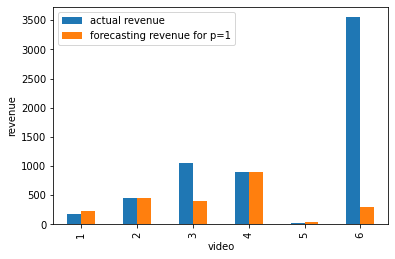

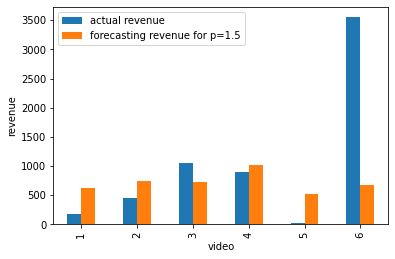

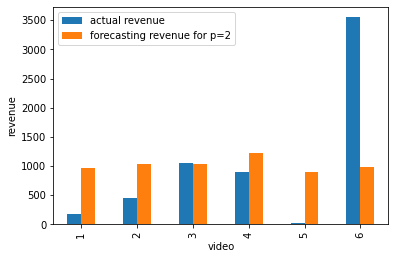

In [ ]:
data.loc[:,['actual revenue','forecasting revenue for p=1']].plot(kind='bar',ylabel='revenue')
data.loc[:,['actual revenue','forecasting revenue for p=1.5']].plot(kind='bar',ylabel='revenue')
data.loc[:,['actual revenue','forecasting revenue for p=2']].plot(kind='bar',ylabel='revenue')

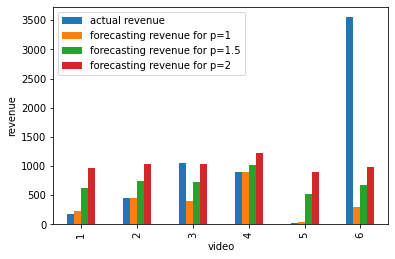

In [ ]:
data.loc[:,['actual revenue','forecasting revenue for p=1','forecasting revenue for p=1.5','forecasting revenue for p=2']].plot(kind='bar',ylabel='revenue')

$ \huge{solution \ \ of \ \ 2.8}$

according to graph clearly forecast model is not good fit for given data  may be linear model for forecast revenue is not followed by utube something else follow by utube but if linear model is good then may require some more data for predict 

because for any p difference of actual revenue and forecast revenue for p=6 is too high compare to other 

for p=1 it better predict for video 2 and 4

but if we concider some video as outlier then p=1 better predict 

for p=1.5 it better predict for video 4 and difference for video 6 is less compare to  p=1

for p=2  it better predict for video 3 and  total diffference is less compare to other so we can say 2 is overall better predict for p=1 it predict better for some video but it difference for video 6 is too high so it is not a good forecasting


  overall we can say that p=2 batter predict compare to other



In [ ]:
data.loc[:,['actual revenue','forecasting revenue for p=1','forecasting revenue for p=1.5','forecasting revenue for p=2']]

,actual revenue,forecasting revenue for p=1,forecasting revenue for p=1.5,forecasting revenue for p=2
video,,,,
1,175,230.171656,628.702108,965.201229
2,450,450.000000,747.407450,1041.921549
3,1050,398.270403,724.183923,1027.716846
4,900,900.000000,1012.052170,1216.663243
5,19,47.876801,529.647922,901.076260
6,3550,299.619348,668.629012,991.420872


$ \huge{solution \ \ of \ \ 2.9}$

for p=1 it better predict for video 2 and 4

for p=1.5 it better predict for video 4 and difference for video 6 is less compare to p=1

for p=2  it better predict for video 3 total diffference is less compare to other so we can say 2 is overall better predict but p=1 better predict for more video so p=1 is also batter predictor but it also very bad predictor for some of them like video 6

we want to minimize the differnce of actual revenue and forecasting revenue for each case for that we taken $L^p$ norm and want to check if we change the value of p is we get better approximation 

for p=1 we get $L^1$ norm  of differnce of actual revenue and forecasting revenue as 3986.158705346472

if we concider some video as outlier then p=1 better predict

for p=1.5 we can find by taking $(1/p)^{th}$ power of our objective and we get 
$L^{1.5}$ norm of differnce of actual revenue and forecasting revenue as 3282.526803990223

for p=2 we can find by taking $(1/p)^{th}$ power of our objective and we get 
$L^2$  norm of differnce of actual revenue and forecasting revenue as 2898.2661949876538

since when p=2 we get better approximation among them so we can say p=2 better approximate because $L^2$ norm of differnce of actual revenue and forecasting revenue is less than another $L^P$ norm for p=1,p=1.5 but no one among them good fit to our data


L1 NORM=3986.158705346472

L1.5 NORM=3282.526803990223

L2 NORM=2898.2661949876538

|video|actual revenue|forecasting revenue for p=1|forecasting revenue for p=1\.5|forecasting revenue for p=2|
|---|---|---|---|---|
|1|175|230\.1716555575259|628\.7021081923602|965\.2012294863167|
|2|450|450\.0000000071345|747\.4074504366749|1041\.9215492382177|
|3|1050|398\.27040314694614|724\.1839230813847|1027\.7168461229264|
|4|900|900\.0000000077011|1012\.0521695225439|1216\.6632431129337|
|5|19|47\.87680085631402|529\.6479224168348|901\.0762604078004|
|6|3550|299\.61934788543334|668\.6290117130712|991\.420871671806|




so p=2 is good for our problem